# 2-D Exploratory Data Analysis

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [4]:
%%R
 
# Import data with R
df <- read_csv('nyc_census_tobacco.csv', show_col_types = FALSE)
df

# A tibble: 1,656 × 8
         GEOID NAME    geometry med_inc_estimate med_inc_moe census_tract counts
         <dbl> <chr>   <chr>               <dbl>       <dbl>        <dbl>  <dbl>
 1 36081014700 Census… list(li…            71815       18034  36081014700      7
 2 36047058400 Census… list(li…            67315       10294  36047058400      2
 3 36047055700 Census… list(li…           107410       37032  36047055700      2
 4 36005022101 Census… list(li…            37200       15878  36005022101      2
 5 36081047000 Census… list(li…            50000       36794  36081047000      1
 6 36047050402 Census… list(li…           134602       71643  36047050402      5
 7 36047028501 Census… list(li…            50278       15242  36047028501      6
 8 36081017901 Census… list(li…            61681       17183  36081017901      2
 9 36047033900 Census… list(li…            51950       25442  36047033900      2
10 36047055000 Census… list(li…            67391       11998  36047055000      3
# ℹ 1,

# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




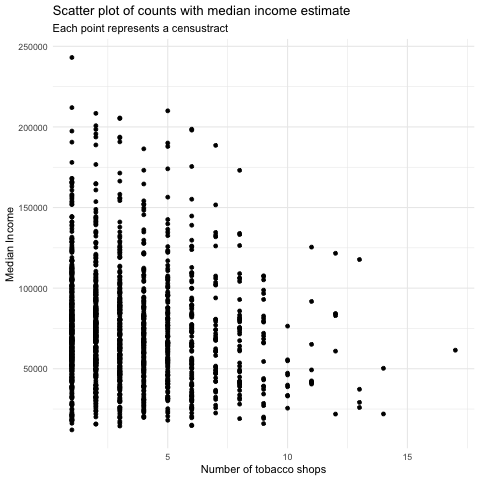

In [6]:
%%R

# code for scatter plot 1
# be sure to include a meaningful title and subtitle

#plot a scatter chart of the counts with med_income_estimate
ggplot(df, aes(x = counts, y = med_inc_estimate)) +
  geom_point() +
  labs(title = "Scatter plot of counts with median income estimate", subtitle = "Each point represents a censustract") +
  xlab("Number of tobacco shops") +
  ylab("Median Income") +
  theme_minimal()


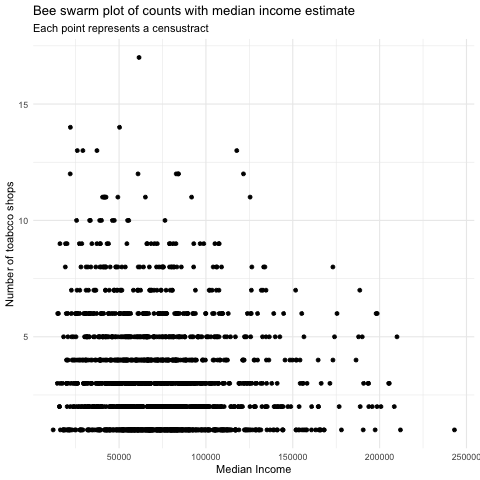

In [9]:
%%R

library(ggbeeswarm)

# code for scatter plot 2
# be sure to include a meaningful title and subtitle

# plot a bee swarm for the counts with med_income_estimate
ggplot(df, aes(x = med_inc_estimate, y = counts)) +
  geom_beeswarm() +
  labs(title = "Bee swarm plot of counts with median income estimate", subtitle = "Each point represents a censustract") +
  xlab("Median Income") +
  ylab("Number of toabcco shops") +
  theme_minimal()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Continuous x aesthetic
ℹ did you forget `aes(group = ...)`? 



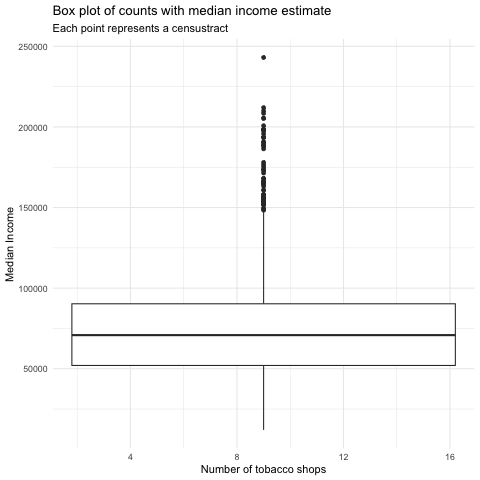

In [13]:
%%R

# code for scatter plot 3
# be sure to include a meaningful title and subtitle

# box plot of counts with med_income_estimate
ggplot(df, aes(x = counts, y = med_inc_estimate)) +
  geom_boxplot() +
  labs(title = "Box plot of counts with median income estimate", subtitle = "Each point represents a censustract") +
  xlab("Number of tobacco shops") +
  ylab("Median Income") +
  theme_minimal()

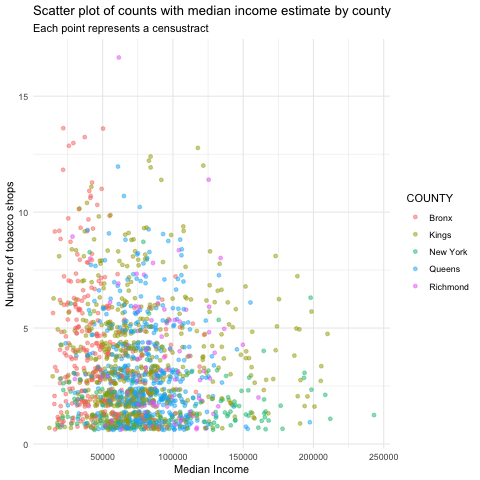

In [17]:
%%R

# plot by county median income to number of tobacco shops with jitter
ggplot(df, aes(x = med_inc_estimate, y = counts, color = COUNTY)) +
    geom_jitter(alpha = 0.5) +
    labs(title = "Scatter plot of counts with median income estimate by county", subtitle = "Each point represents a censustract") +
    xlab("Median Income") +
    ylab("Number of tobacco shops") +
    theme_minimal()
